# Analysis of Variance 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Single-factor-ANOVA" data-toc-modified-id="Single-factor-ANOVA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single-factor ANOVA</a></span><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Fit-ANOVA-model-to-the-data" data-toc-modified-id="Fit-ANOVA-model-to-the-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Fit ANOVA model to the data</a></span></li><li><span><a href="#Your-Turn-Activity-I:-Interactive-Systems" data-toc-modified-id="Your-Turn-Activity-I:-Interactive-Systems-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Your Turn Activity I: Interactive Systems</a></span></li></ul></li><li><span><a href="#Residual-diagnostics" data-toc-modified-id="Residual-diagnostics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Residual diagnostics</a></span><ul class="toc-item"><li><span><a href="#Normality-Check-Plotting-function" data-toc-modified-id="Normality-Check-Plotting-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Normality Check Plotting function</a></span></li><li><span><a href="#Check-normality-assumption" data-toc-modified-id="Check-normality-assumption-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Check normality assumption</a></span></li></ul></li><li><span><a href="#Post-hoc-Analysis" data-toc-modified-id="Post-hoc-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Post-hoc Analysis</a></span><ul class="toc-item"><li><span><a href="#Tukey's-HSD-test" data-toc-modified-id="Tukey's-HSD-test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tukey's HSD test</a></span></li><li><span><a href="#Your-Turn-Activity-II:" data-toc-modified-id="Your-Turn-Activity-II:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Your Turn Activity II:</a></span></li></ul></li><li><span><a href="#Violation-of-normality-assumptions" data-toc-modified-id="Violation-of-normality-assumptions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Violation of normality assumptions</a></span><ul class="toc-item"><li><span><a href="#Levene-Test-for-variance-equality" data-toc-modified-id="Levene-Test-for-variance-equality-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Levene Test for variance equality</a></span></li><li><span><a href="#Kruskal-Wallis-test" data-toc-modified-id="Kruskal-Wallis-test-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Kruskal-Wallis test</a></span></li></ul></li></ul></div>

**Load required libraries**

In [24]:
print('\nEnabling interactive shell outputs ...')
print('   Use command pass; to disable cell text outputs')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore') 
warnings.simplefilter(action="ignore",category=UserWarning)
warnings.simplefilter(action="ignore",category=FutureWarning)

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


Enabling interactive shell outputs ...
   Use command pass; to disable cell text outputs


## Single-factor ANOVA

### Load dataset

In [25]:
df = pd.read_excel('data/lect03-anova.xlsx', sheet_name='Apple1')
df

phos_df = pd.melt(df, id_vars='Apple', value_vars=df.columns[1:],
                        value_name='Phosphorus').drop(columns=['variable'])
phos_df

,Apple,n1,n2,n3,n4,n5
0,Apple1,0.35,0.4,0.58,0.50,0.47
1,Apple2,0.65,0.7,0.90,0.84,0.79
2,Apple3,0.60,0.8,0.75,0.73,0.66


,Apple,Phosphorus
0,Apple1,0.35
1,Apple2,0.65
2,Apple3,0.60
3,Apple1,0.40
4,Apple2,0.70
5,Apple3,0.80
6,Apple1,0.58
7,Apple2,0.90
8,Apple3,0.75
9,Apple1,0.50


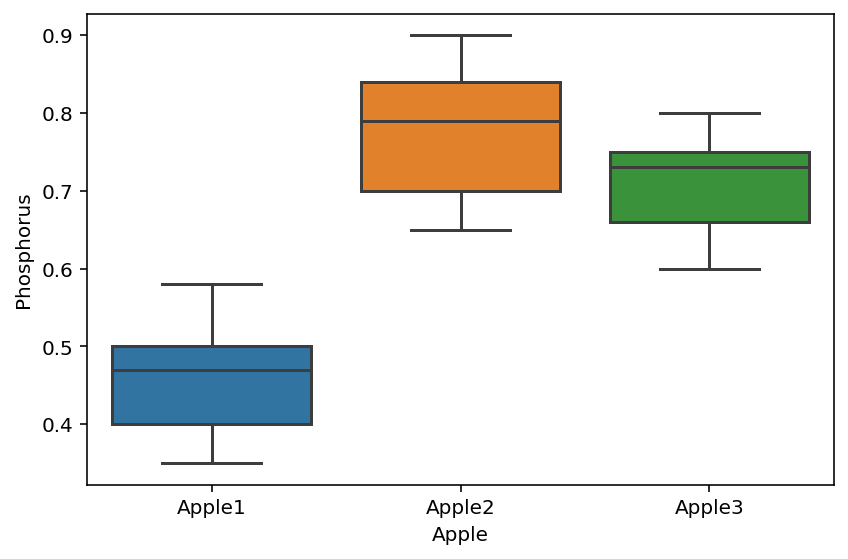

In [26]:
from statsmodels.formula.api import ols # Require patsy version 5.0.1+
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(6,4));
sns.boxplot(x='Apple',y='Phosphorus',data=phos_df)
plt.tight_layout()
pass;

### Fit ANOVA model to the data

In [27]:
### Generate ANOVA table
phos_app_model = ols('Phosphorus ~ Apple', data=phos_df).fit()
df['resid'] = phos_app_model.resid
aov_table = sm.stats.anova_lm(phos_app_model, typ=1) 
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Apple,2.0,0.27664,0.13832,16.971779,0.000317
Residual,12.0,0.09780,0.00815,NaN,NaN


### Your Turn Activity I: Interactive Systems

In [28]:
df = pd.read_excel('data/lect03-anova.xlsx', sheet_name='Interactive')
df.head(10)

#phos_df = pd.melt(df, id_vars='Apple', value_vars=df.columns[1:],
#                        value_name='Phosphorus').drop(columns=['variable'])
#phos_df

,System,ResponseTime
0,SystemA,0.96
1,SystemA,1.03
2,SystemA,0.77
3,SystemA,0.88
4,SystemA,1.06
5,SystemA,0.99
6,SystemA,0.72
7,SystemA,0.86
8,SystemA,0.97
9,SystemA,0.90


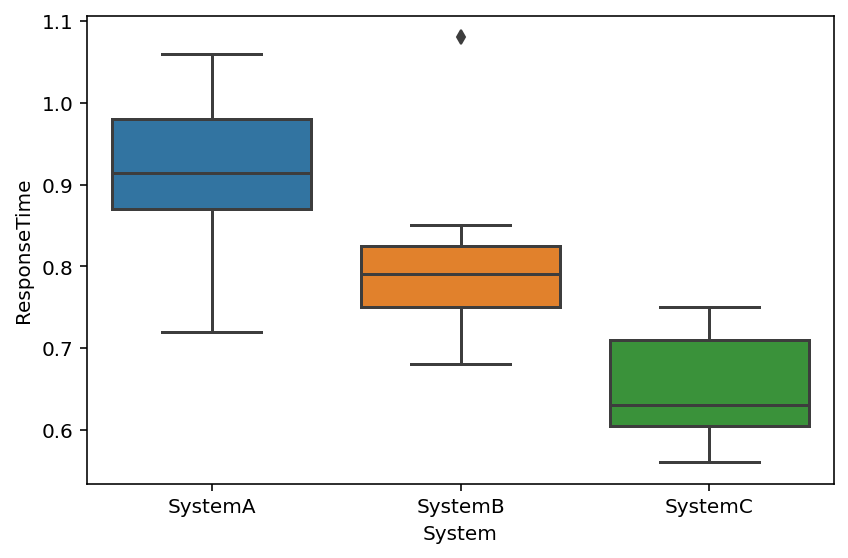

In [20]:
fig = plt.figure(figsize=(6,4));
sns.boxplot(x='System',y='ResponseTime',data=df)
plt.tight_layout()
pass;

In [21]:
sys_interac_model = ols('ResponseTime ~ System', data=df).fit()
df['resid'] = sys_interac_model.resid
aov_table2 = sm.stats.anova_lm(sys_interac_model, typ=1) 
aov_table2

,df,sum_sq,mean_sq,F,PR(>F)
System,2.0,0.374447,0.187224,21.300429,0.000002
Residual,30.0,0.263690,0.008790,NaN,NaN


## Residual diagnostics

### Normality Check Plotting function

In [29]:
def check_anova_normality(group, x):

    T = len(x)
    
    fig = plt.figure(figsize=(10,8))

    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    #ax1.plot(x, color='blue', alpha=0.5, linestyle='--', marker='o', ms=4)
    n=len(x)
    sns.residplot(np.linspace(1,n,n), x, color='blue', ax=ax1)
    ax1.set_title('Sequence plot')
    
    # Scatter plot
    #ax2.scatter(x, x.shift(), alpha=0.5, color='red')
    #ax2.set_title(r'Scatter plot of $e_n$ vs $e_{n+1}$')
    
    # Residual groupplot
    resid_df = pd.DataFrame({'Group':group, 'Resid':x})
    sns.stripplot(x='Group', y='Resid', data=resid_df, ax=ax2) 
    ax2.set_title('Residuals by treatments')
    
    # Box plot
    #ax2.boxplot(x,showmeans=True)
    #ax2.set_title('Boxplot')

    # histogram plot
    sns.distplot(x, hist=True, kde=True, ax=ax3)
    ax3.set_title('Histogram')


    # qq plot
    sm.graphics.qqplot(x,line='q',ax=ax4)
    ax4.set_title('Normal plot')
    plt.tight_layout()

### Check normality assumption

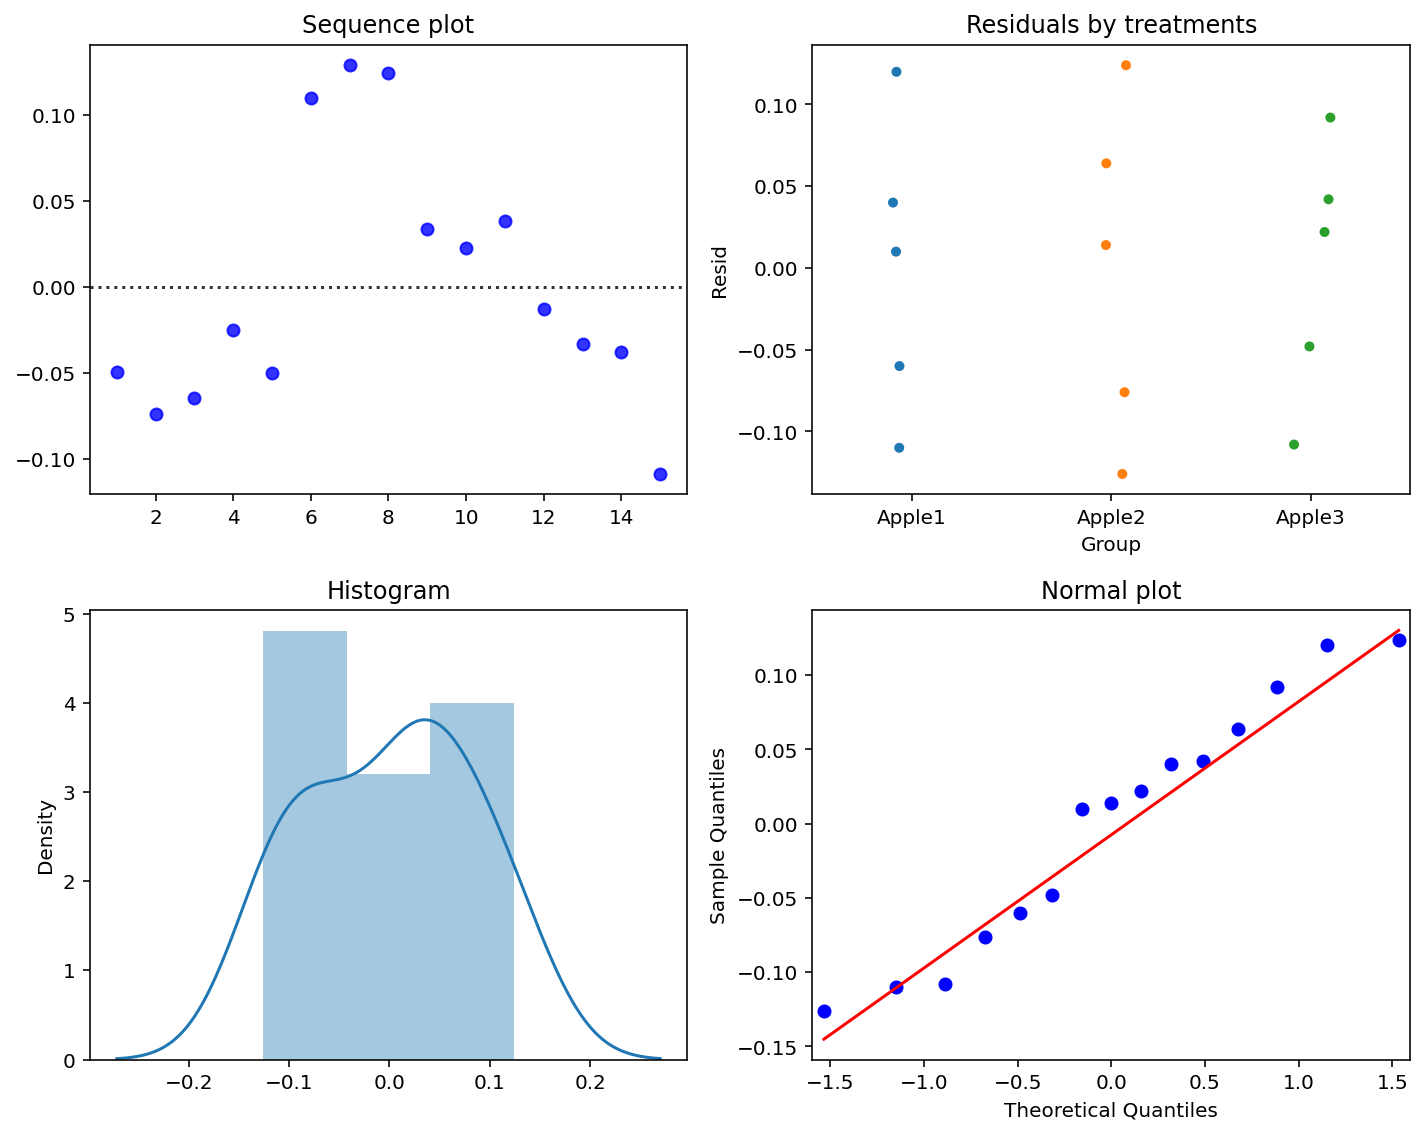

In [30]:
check_anova_normality(phos_df['Apple'], phos_app_model.resid)

## Post-hoc Analysis

### Tukey's HSD test

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Apple1 Apple2    0.316  0.001  0.1637 0.4683   True
Apple1 Apple3    0.248 0.0025  0.0957 0.4003   True
Apple2 Apple3   -0.068 0.4818 -0.2203 0.0843  False
---------------------------------------------------


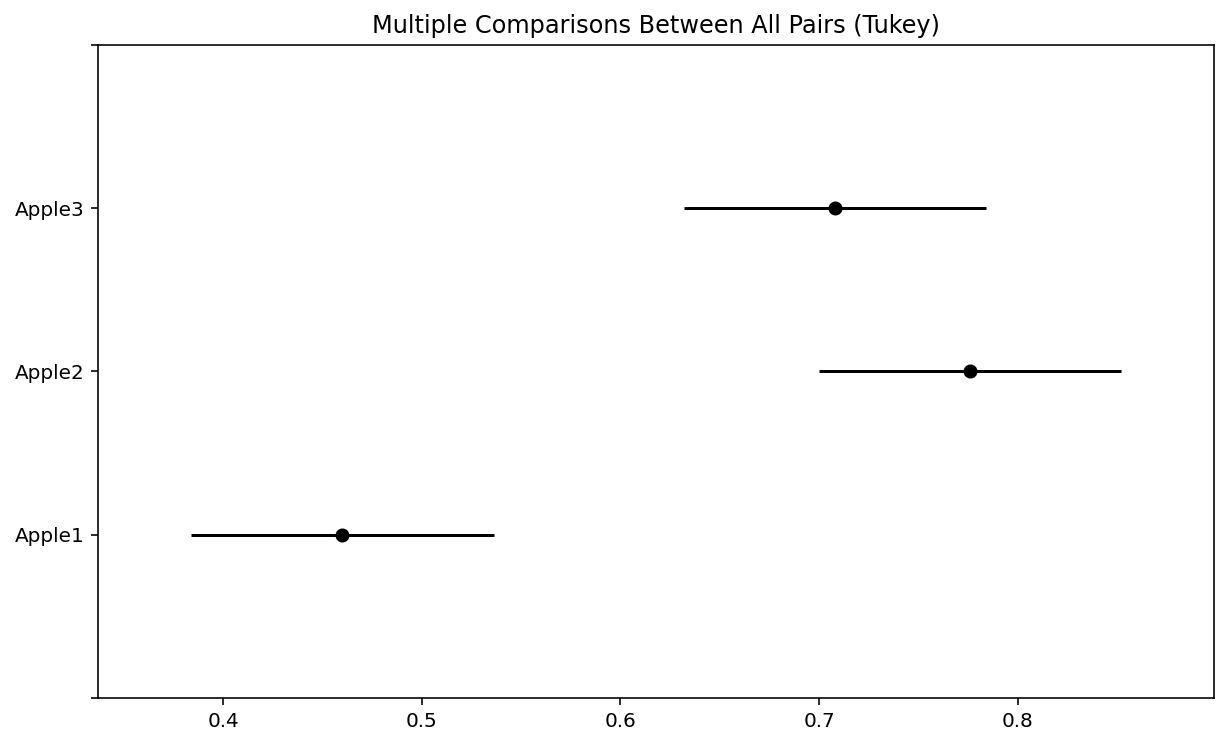

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(phos_df['Phosphorus'],phos_df['Apple'],alpha=0.05)
print(result)
result.plot_simultaneous();    # Plot confidence intervals of all sample means
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

### Your Turn Activity II: 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
SystemA SystemB   -0.111 0.0247 -0.2095 -0.0125   True
SystemA SystemC    -0.26  0.001 -0.3585 -0.1615   True
SystemB SystemC   -0.149 0.0022 -0.2475 -0.0505   True
------------------------------------------------------


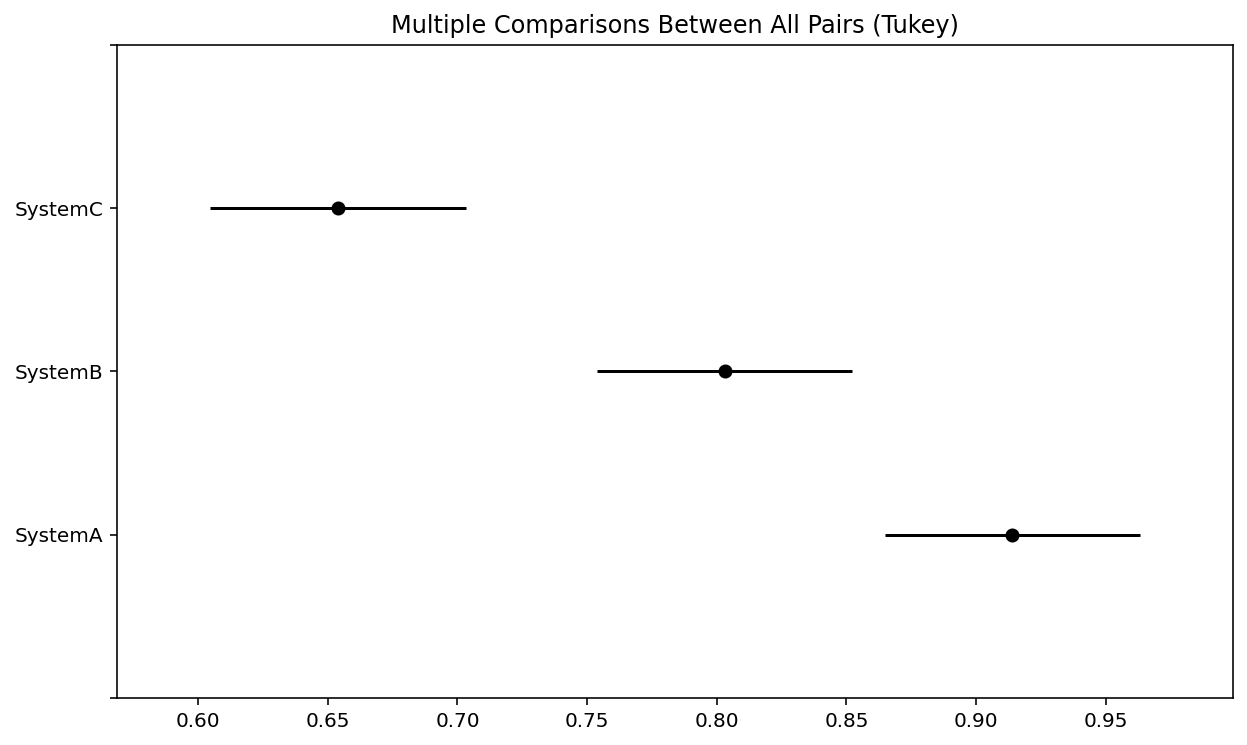

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# alpha = Family-wise error rate
result=pairwise_tukeyhsd(df['ResponseTime'],df['System'],alpha=0.05)
print(result)
result.plot_simultaneous();    # Plot confidence intervals of all sample means
#plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

**ANS** : ทุกคู่(SystemA-SystemB, SystemA-SystemC, SystemB-SystemC)มีค่า mean
ที่ต่างกัน (Reject H0)


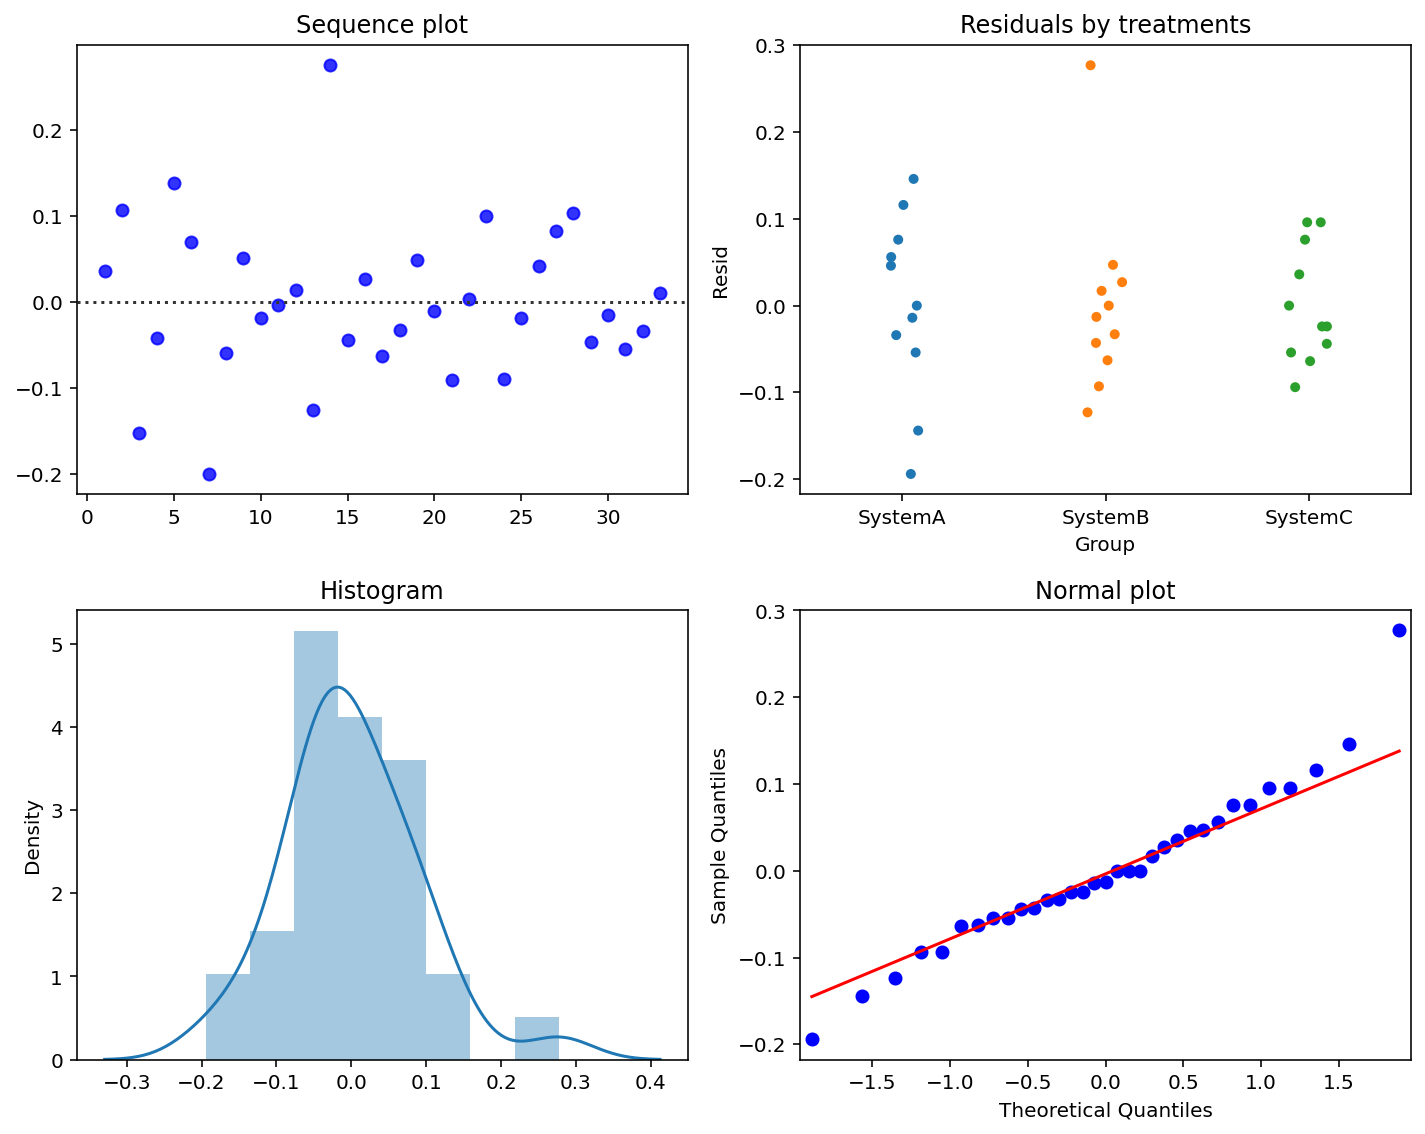

In [36]:
check_anova_normality(df['System'], sys_interac_model.resid)

ช่วงของ residuals ของแต่ละกลุ่ม treatment กระจายอยู่ในช่วงใกล้เคียงกัน -0.1
ถึง 0.1 (residuals vs. treatment averages for equal variance)
residuals ส่วนมากวางตัวอยู่รอบๆเส้นตรงในกราฟ normal plot ดังนัน้ ข้อมูลมี
ลักษณะเปน็ normal distribution


## Violation of normality assumptions

### Levene Test for variance equality

In [1]:
from scipy import stats


y1=[0.96,1.03,0.77,0.88,1.06,0.99,0.72,0.86,0.97,0.90]
y2=[0.82,0.68,1.08,0.76,0.83,0.74,0.77,0.85,0.79,0.71]
y3=[0.75,0.56,0.63,0.69,0.73,0.75,0.60,0.63,0.59,0.61]

# Test for homogeneity of variance
f0,pval = stats.levene(y1, y2, y3); 
print("Levene's test statistic: {:.5f}, p-value: {:.5f}".format(f0,pval))

Levene's test statistic: 0.58608, p-value: 0.56343


### Kruskal-Wallis test
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

In [17]:
from scipy import stats

x=[24, 16.7, 22.8, 19.8, 18.9]
y=[23.2, 19.8, 18.1, 17.6, 20.2, 17.8]
z=[18.4, 19.1,17.3, 17.3, 19.7,18.9,18.8,19.3]
result=stats.kruskal(x,y,z) 
 
print('F-statistic: {:.4f}'.format(result.pvalue))
print('p-value: {:.4f}'.format(result.statistic))

F-statistic: 0.4354
p-value: 1.6630
